In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
diabetes=pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
numpreg=tf.feature_column.numeric_column('Number_pregnant')
plasmagluc=tf.feature_column.numeric_column('Glucose_concentration')
diaspress=tf.feature_column.numeric_column('Blood_pressure')
tricep=tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
diabetespedigree=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')










In [12]:
assignedgroup=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
#assignedgroup=tf.feature_column.categorical_column_with_hash_bucket

In [14]:
import matplotlib.pyplot as plt

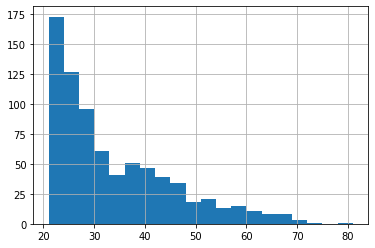

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
agebucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
featcols=[numpreg,plasmagluc,diaspress,tricep,insulin,bmi,diabetespedigree,agebucket]

In [18]:
#TrainTestSplit

In [19]:
xdata=diabetes.drop('Class',axis=1)
xdata.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels=diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,labels,test_size=0.3,random_state=101)

In [32]:
inputfunc=tf.estimator.inputs.pandas_input_fn(x=xtrain,y=ytrain,batch_size=10,num_epochs=1000,shuffle=True)

In [34]:
model=tf.estimator.LinearClassifier(feature_columns=featcols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmph7dvv7yl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000294CA01C6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
model.train(input_fn=inputfunc,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hp\AppData

In [37]:
#EvALUATE THE MODEL
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=xtest,y=ytest,batch_size=10,num_epochs=1,shuffle=False)

In [38]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-03T09:37:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmph7dvv7yl\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-03-09:37:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.7983539, auc_precision_recall = 0.64811766, average_loss = 0.5259278, global_step = 1000, label/mean = 0.35064936, loss = 5.0620546, precision = 0.65625, prediction/mean = 0.35540897, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Hp\AppData\Local\Temp\tmph7dvv7yl\model.ckpt-1000


In [39]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7983539,
 'auc_precision_recall': 0.64811766,
 'average_loss': 0.5259278,
 'label/mean': 0.35064936,
 'loss': 5.0620546,
 'precision': 0.65625,
 'prediction/mean': 0.35540897,
 'recall': 0.5185185,
 'global_step': 1000}

In [40]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=xtest,batch_size=10,num_epochs=1,shuffle=False)

In [41]:
predictions=model.predict(pred_input_func)

In [42]:
mypred=list(predictions)
mypred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmph7dvv7yl\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.09437478], dtype=float32),
  'logistic': array([0.4764238], dtype=float32),
  'probabilities': array([0.5235762, 0.4764238], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5164696], dtype=float32),
  'logistic': array([0.62632185], dtype=float32),
  'probabilities': array([0.37367815, 0.62632185], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.56427413], dtype=float32),
  'logistic': array([0.36255908], dtype=float32),
  'probabilities': array([0.6374409 , 0.36255908], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},


In [43]:
#Classifier by dense neural network(DNN)
dnnmodel=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=featcols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmpnz2wkc36', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000294CA0CD160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnnmodel.train(input_fn=input_func,steps=1000)

NameError: name 'input_func' is not defined

In [52]:
embedded_group_col=tf.feature_column.embedding_column(assignedgroup,dimension=4)

In [53]:
featcols=[numpreg,plasmagluc,diaspress,tricep,insulin,bmi,diabetespedigree,embedded_group_col,agebucket]

In [54]:
input_func=tf.estimator.inputs.pandas_input_fn(xtrain,ytrain,batch_size=10,num_epochs=1000,shuffle=True)

In [55]:
dnnmodel=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=featcols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmpis6fe90e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000294CA0D0198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
dnnmodel.train(input_fn=inputfunc,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hp\AppData\Local\Temp\tmpis6fe90e\model.ckpt.
INFO:tensorflow:loss = 7.3450074, step = 1
INFO:tensorflow:global_step/sec: 270.15
INFO:tensorflow:loss = 5.2477703, step = 101 (0.373 sec)
INFO:tensorflow:global_step/sec: 407.588
INFO:tensorflow:loss = 6.16708, step = 201 (0.244 sec)
INFO:tensorflow:global_step/sec: 437.068
INFO:tensorflow:loss = 4.0549364, step = 301 (0.229 sec)
INFO:tensorflow:global_step/sec: 407.593
INFO:tensorflow:loss = 7.167634, step = 401 (0.245 sec)
INFO:tensorflow:global_step/sec: 401.067
INFO:tensorflow:loss = 5.253678, step = 501 (0.251 sec)
INFO:tensorflow:global_step/sec: 419.533
INFO:tensorflow:loss = 2.8496325, step = 601 (0.235 sec)
INFO:tensorflow:global_step/sec: 459

In [61]:
evalinputfunc=tf.estimator.inputs.pandas_input_fn(x=xtest,y=ytest,batch_size=10,num_epochs=1,shuffle=False)

In [62]:
dnnmodel.evaluate(eval_input_func) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-03T10:04:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpis6fe90e\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-03-10:04:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8270782, auc_precision_recall = 0.72447217, average_loss = 0.50686014, global_step = 1000, label/mean = 0.35064936, loss = 4.878529, precision = 0.75, prediction/mean = 0.2744973, recall = 0.4814815
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Hp\AppData\Local\Temp\tmpis6fe90e\model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8270782,
 'auc_precision_recall': 0.72447217,
 'average_loss': 0.50686014,
 'label/mean': 0.35064936,
 'loss': 4.878529,
 'precision': 0.75,
 'prediction/mean': 0.2744973,
 'recall': 0.4814815,
 'global_step': 1000}